In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

DATA_PATH = '../data/online_retail.csv'
IMG_DIR = '../images'
os.makedirs(IMG_DIR, exist_ok=True)

pd.set_option('display.max_columns', 50)
print('pandas', pd.__version__)

pandas 2.3.3


In [2]:
# Carga de datos
df = pd.read_csv(DATA_PATH, parse_dates=['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,InvoiceDate,Country,CustomerID
0,689424,84879,ASSORTED COLOUR BIRD ORNAMENT,4,1.81,2024-03-03 12:19:14,Switzerland,11130.0
1,751819,22633,HAND WARMER UNION JACK,4,1.76,2025-07-26 14:24:27,United Kingdom,11123.0
2,23092,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3,2.88,2025-04-10 08:33:08,Sweden,10385.0
3,23092,84879,ASSORTED COLOUR BIRD ORNAMENT,1,1.77,2025-04-10 08:33:08,Sweden,10385.0
4,23092,22423,REGENCY CAKESTAND 3 TIER,2,12.95,2025-04-10 08:33:08,Sweden,10385.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83135 entries, 0 to 83134
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    83135 non-null  int64         
 1   StockCode    83135 non-null  object        
 2   Description  82289 non-null  object        
 3   Quantity     83135 non-null  int64         
 4   UnitPrice    83135 non-null  float64       
 5   InvoiceDate  83135 non-null  datetime64[ns]
 6   Country      83135 non-null  object        
 7   CustomerID   82317 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 5.1+ MB


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
InvoiceNo,83135.0,NaN,NaN,NaN,497577.677585,55.0,246761.5,497971.0,746122.5,999989.0,288997.238258
StockCode,83135,15,22633,5693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,82289,15,HAND WARMER UNION JACK,5644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,83135.0,NaN,NaN,NaN,3.819234,-22.0,2.0,3.0,5.0,40.0,2.865997
UnitPrice,83135.0,NaN,NaN,NaN,3.88964,0.0,1.9,3.22,4.31,15.1,2.829305
InvoiceDate,83135,NaN,NaN,NaN,2024-11-15 13:11:33.675984640,2024-01-01 00:43:58,2024-06-07 14:38:14,2024-11-18 05:13:57,2025-04-24 22:54:28,2025-09-29 23:46:08,NaN
Country,83135,15,United Kingdom,44028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerID,82317.0,NaN,NaN,NaN,10600.985033,10000.0,10302.0,10599.0,10902.0,11199.0,345.931688


In [5]:
# Limpieza de datos
before = len(df)
df.drop_duplicates(inplace=True)
after = len(df)
print(f"Filas eliminadas por duplicados: {before - after}")

Filas eliminadas por duplicados: 27


In [6]:
df['Description'] = df['Description'].fillna('Unknown')
before = len(df)
df = df.dropna(subset=['CustomerID'])
after = len(df)
print(f"Filas eliminadas por CustomerID nulo: {before - after}")
df['CustomerID'] = df['CustomerID'].astype(int)

Filas eliminadas por CustomerID nulo: 818


In [7]:
invalid_price = (df['UnitPrice'] <= 0).sum()
print('Filas con precio inválido:', invalid_price)
df = df[df['UnitPrice'] > 0]

Filas con precio inválido: 432


In [8]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,InvoiceDate,Country,CustomerID,Year,Month,DayOfWeek,Hour,Revenue
0,689424,84879,ASSORTED COLOUR BIRD ORNAMENT,4,1.81,2024-03-03 12:19:14,Switzerland,11130,2024,3,Sunday,12,7.24
1,751819,22633,HAND WARMER UNION JACK,4,1.76,2025-07-26 14:24:27,United Kingdom,11123,2025,7,Saturday,14,7.04
2,23092,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3,2.88,2025-04-10 08:33:08,Sweden,10385,2025,4,Thursday,8,8.64
3,23092,84879,ASSORTED COLOUR BIRD ORNAMENT,1,1.77,2025-04-10 08:33:08,Sweden,10385,2025,4,Thursday,8,1.77
4,23092,22423,REGENCY CAKESTAND 3 TIER,2,12.95,2025-04-10 08:33:08,Sweden,10385,2025,4,Thursday,8,25.90


In [9]:
@ Análisis descriptivo con Pandas
sales_by_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).round(2)
sales_by_country.head(10)

SyntaxError: invalid syntax (3337521803.py, line 1)

In [10]:
top_products_qty = (df[df['Quantity']>0]
                    .groupby(['StockCode','Description'])['Quantity']
                    .sum().sort_values(ascending=False).head(10))
top_products_qty

StockCode  Description                       
22633      HAND WARMER UNION JACK                22032
71053      WHITE METAL LANTERN                   21439
20725      LUNCH BOX I LOVE LONDON               21346
84029E     RED WOOLLY HOTTIE WHITE HEART.        21336
84406B     CREAM CUPID HEARTS COAT HANGER        21298
22139      RETROSPOT TEA SET CERAMIC 11 PC       21228
85123A     WHITE HANGING HEART T-LIGHT HOLDER    21150
22632      HAND WARMER RED POLKA DOT             20981
47566      PARTY BUNTING                         20928
22423      REGENCY CAKESTAND 3 TIER              20857
Name: Quantity, dtype: int64

In [11]:
top_products_rev = (df.groupby(['StockCode','Description'])['Revenue']
                    .sum().sort_values(ascending=False).head(10).round(2))
top_products_rev

StockCode  Description                        
22423      REGENCY CAKESTAND 3 TIER               260369.83
22752      SET 7 BABUSHKA NESTING BOXES           155801.53
47566      PARTY BUNTING                          101535.99
22139      RETROSPOT TEA SET CERAMIC 11 PC         87840.01
21730      GLASS STAR FROSTED T-LIGHT HOLDER       86549.80
71053      WHITE METAL LANTERN                     71347.16
84029E     RED WOOLLY HOTTIE WHITE HEART.          70865.52
84029G     KNITTED UNION FLAG HOT WATER BOTTLE     68325.96
85123A     WHITE HANGING HEART T-LIGHT HOLDER      61033.65
84406B     CREAM CUPID HEARTS COAT HANGER          57479.46
Name: Revenue, dtype: float64

In [12]:
top_customers = (df.groupby('CustomerID')['Revenue']
                 .sum().sort_values(ascending=False).head(10).round(2))
top_customers

CustomerID
10412    1874.56
10392    1857.74
10460    1814.29
10623    1795.51
10572    1785.95
10913    1770.20
10748    1766.25
10189    1760.37
10567    1707.17
10989    1688.58
Name: Revenue, dtype: float64

In [13]:
monthly_revenue = (df.groupby(['Year','Month'])['Revenue']
                   .sum().reset_index().sort_values(['Year','Month']))
monthly_revenue.head()

,Year,Month,Revenue
0,2024,1,60932.84
1,2024,2,54494.90
2,2024,3,62008.69
3,2024,4,55958.60
4,2024,5,57414.54


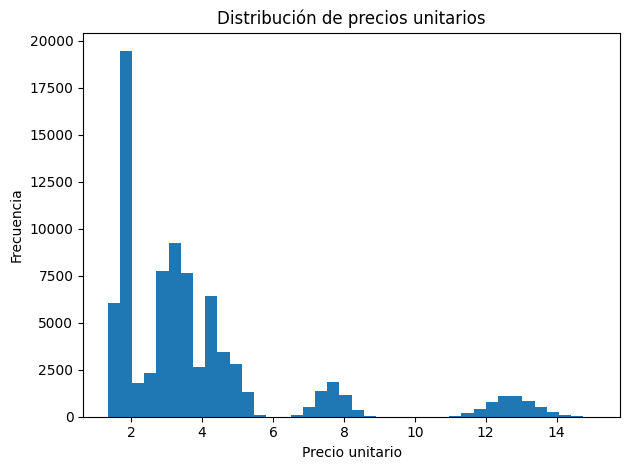

In [14]:
# Visualizaciones con matplotlib
plt.figure()
plt.hist(df['UnitPrice'].values, bins=40)
plt.title('Distribución de precios unitarios')
plt.xlabel('Precio unitario')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.savefig(f"{IMG_DIR}/hist_unitprice.png")
plt.show()

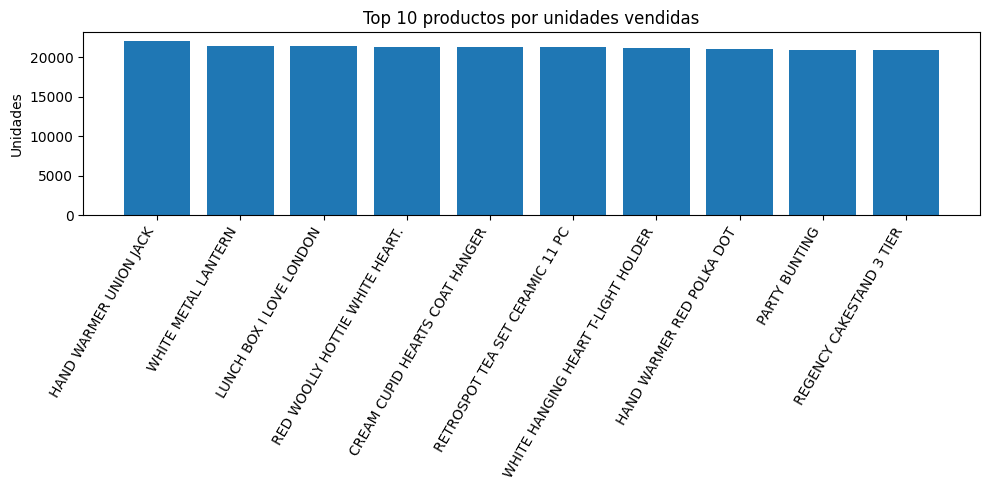

In [15]:
tpq = top_products_qty.reset_index().rename(columns={'Quantity':'Units'})
plt.figure(figsize=(10,5))
plt.bar(tpq['Description'], tpq['Units'])
plt.title('Top 10 productos por unidades vendidas')
plt.xticks(rotation=60, ha='right')
plt.ylabel('Unidades')
plt.tight_layout()
plt.savefig(f"{IMG_DIR}/bar_top_products_qty.png")
plt.show()

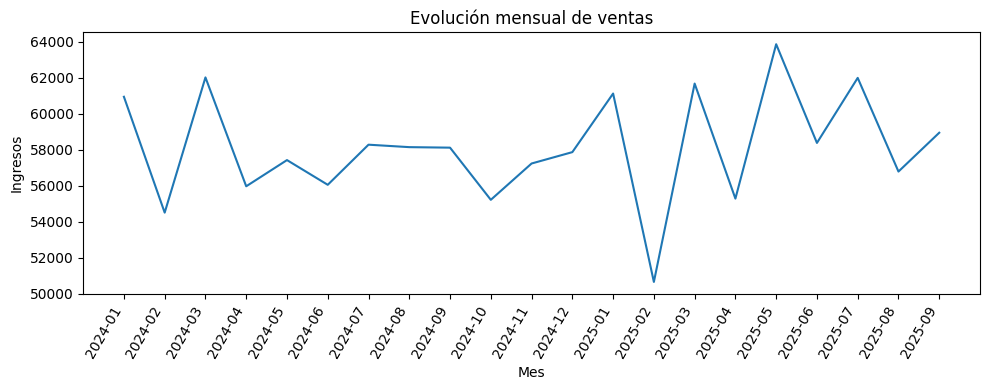

In [16]:
monthly_revenue['YearMonth'] = monthly_revenue['Year'].astype(str) + '-' + monthly_revenue['Month'].astype(str).str.zfill(2)
plt.figure(figsize=(10,4))
plt.plot(monthly_revenue['YearMonth'], monthly_revenue['Revenue'])
plt.title('Evolución mensual de ventas')
plt.xlabel('Mes')
plt.ylabel('Ingresos')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.savefig(f"{IMG_DIR}/line_monthly_revenue.png")
plt.show()

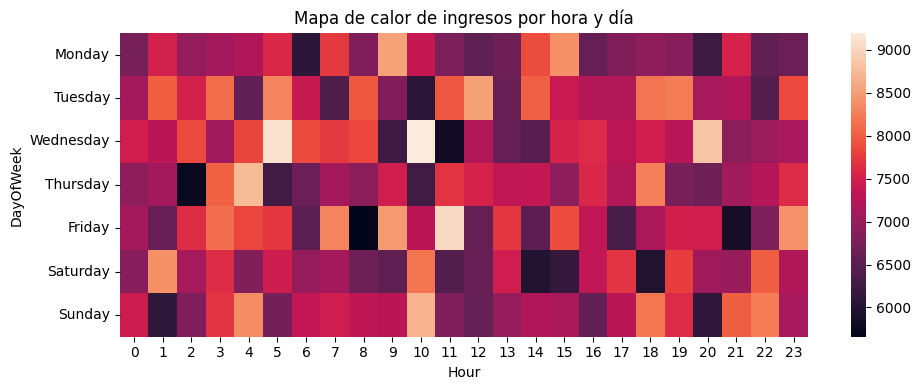

In [17]:
pivot = df.pivot_table(values='Revenue', index='DayOfWeek', columns='Hour', aggfunc='sum').fillna(0)
ordered_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pivot = pivot.reindex(ordered_days)
plt.figure(figsize=(10,4))
import seaborn as sns
sns.heatmap(pivot, annot=False)
plt.title('Mapa de calor de ingresos por hora y día')
plt.tight_layout()
plt.savefig(f"{IMG_DIR}/heatmap_day_hour_revenue.png")
plt.show()

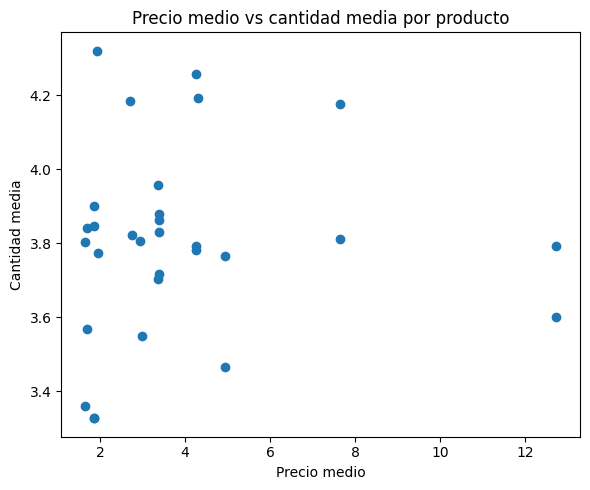

In [18]:
agg = df.groupby(['StockCode','Description']).agg(avg_price=('UnitPrice','mean'),
                                                 avg_qty=('Quantity','mean')).reset_index()
plt.figure(figsize=(6,5))
plt.scatter(agg['avg_price'], agg['avg_qty'])
plt.title('Precio medio vs cantidad media por producto')
plt.xlabel('Precio medio')
plt.ylabel('Cantidad media')
plt.tight_layout()
plt.savefig(f"{IMG_DIR}/scatter_price_qty.png")
plt.show()